# matplotlib简介

matplotlib 是一个 python 2D 绘图库，利用它可以画出许多高质量的图像。只需几行代码即可生成直方图，条形图，饼图，散点图等。matplotlib 可用于python 脚本，python 和IPython shell，Jupyter 笔记本等。

# matplotlib 绘图入门

## 图的构成
matplotlib 的图的构成元素包括：坐标轴(axis)、坐标轴名称(axis label)、坐标轴刻度(tick)、坐标轴刻度标签(tick label)、网格线(grid)、图例(legend)、标题(title)等。

## 标题设置

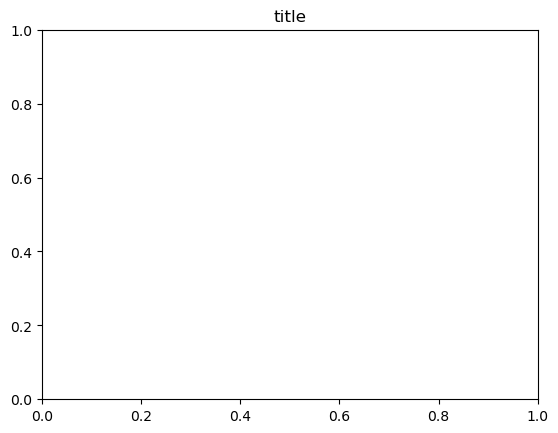

In [1]:
import matplotlib.pyplot as plt
plt.title("title")#括号当中输入标题的名称
plt.show()

如果 title 是中文，matplotlib 会乱码。想要输入中文的话需要在代码开头处添加下面这句代码：
```
mpl.rcParams['font.family'] = 'SimHei'
```

## Figure 对象

在 matplotlib 中，整个图像为一个 Figure 对象。在 Figure 对象中可以包含一个或者多个 Axes 对象。每个 Axes(ax) 对象都是一个拥有自己坐标系统的绘图区域。

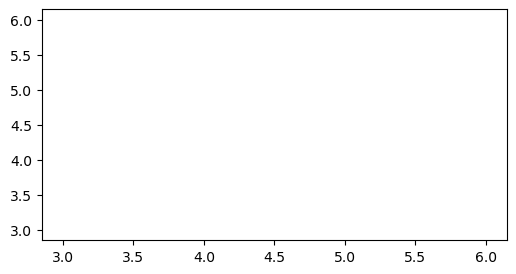

In [20]:
plt.figure(figsize=(6, 3))
plt.plot(6, 3)
plt.plot(3, 3 * 2)
plt.show()

## 坐标轴及标签

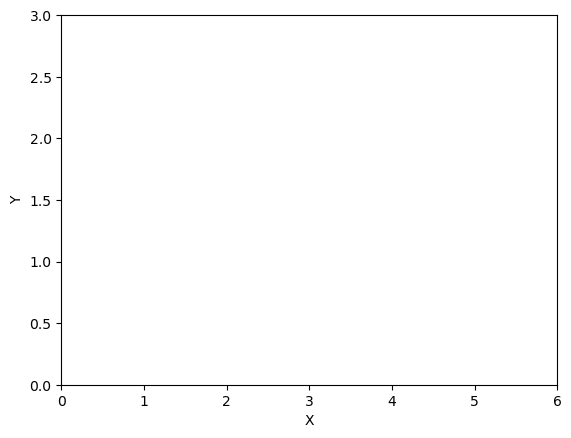

In [21]:
plt.xlim(0,6) #x轴坐标轴
plt.ylim((0, 3))#y轴坐标轴
plt.xlabel('X')#x轴标签
plt.ylabel('Y')#y轴标签
plt.show()

如果需要将数字设为负数，也可能出现乱码的情况，这时候可以加下面的代码：
```
plt.rcParams['axes.unicode_minus']=False
```

## 设置label和legend

设置 label 和 legend 的目的就是为了区分出每个数据对应的图形名称, legend 的 loc 参数用于设置图例位置。

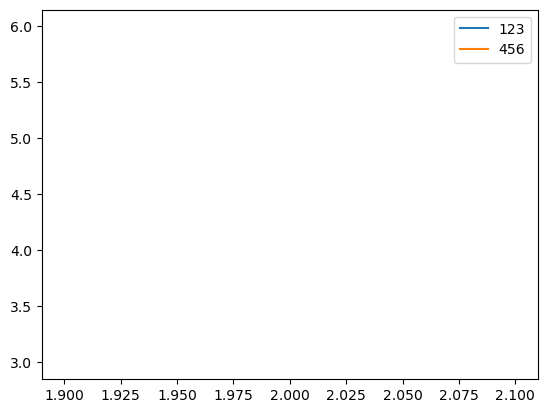

In [22]:
plt.plot(2, 3, label="123")#第一个label
plt.plot(2, 3* 2, label="456")#第二个label
plt.legend(loc='best')#图列位置，可选best，center等
plt.show()

## 添加注释

有时候我们需要对特定的点进行标注，我们可以使用 plt.annotate 函数来实现:
s: 注释信息内容                                 
xy:箭头点所在的坐标位置                                            
xytext:注释内容的坐标位置                                                  
arrowprops：设置指向箭头的参数                                                

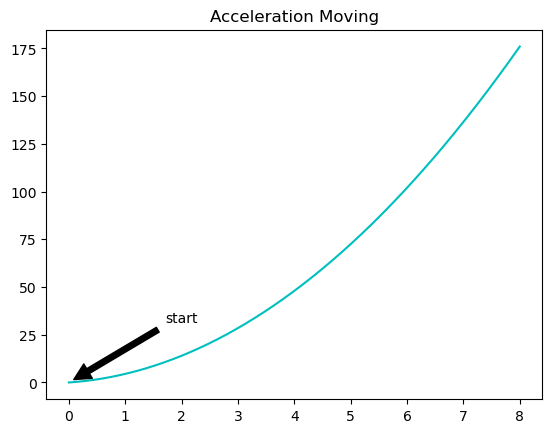

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 8, 1000)
y = 2.0 * x + 0.5 * 5 * x ** 2
plt.annotate('start',
        ha = 'center', va = 'bottom',
        xytext = (2, 30.),
        xy = (0, 0),
        arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })
plt.title('Acceleration Moving')
plt.plot(x, y, c = 'c')
plt.show()

## 使用子图

如果需要将多张子图展示在一起，可以使用 subplot() 实现。即在调用 plot() 函数之前需要先调用 subplot() 函数。该函数的第一个参数代表子图的总行数，第二个参数代表子图的总列数，第三个参数代表活跃区域。

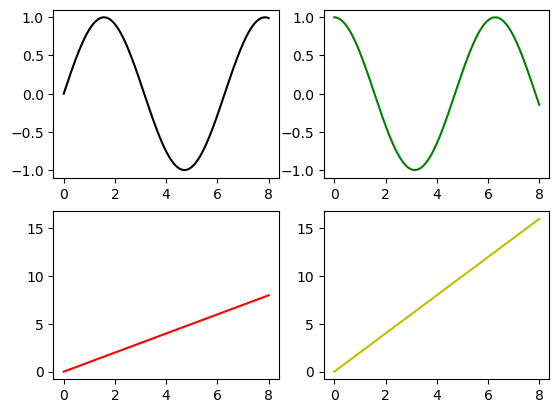

In [30]:
ax1 = plt.subplot(2, 2, 1)
plt.plot(x,np.sin(x), 'k')

ax2 = plt.subplot(2, 2, 2, sharey=ax1) # 与 ax1 共享y轴
plt.plot(x, np.cos(x), 'g')

ax3 = plt.subplot(2, 2, 3)
plt.plot(x,x, 'r')

ax4 = plt.subplot(2, 2, 4, sharey=ax3) # 与 ax3 共享y轴
plt.plot(x, 2*x, 'y')

matplotlib 画图可以总结为3个步骤：获取数据——画出基本图形——设置细节。获取的数据一般包括横坐标和纵坐标的数据，这个数据可以是读取的，也可以自己生成，本文为了方便演示，使用 numpy 和 pandas 生成随机数。

matplotlib 所提供的图形非常丰富，除了基本的柱状图、饼图、散点图等，还提供了极坐标图、3D 图等高级图形，并且我们可以自由选择和组合。每个图形函数下都有许多参数可设置，matplotlib 提供的不仅仅是图形，还有更为精细的图像表达，我们可以通过细节的设置来丰富你的可视化。

**下边，让我们来一起绘制一个比较复杂的散点图吧！**

绘制散点图，主要用到 plt.scatter（）这个函数。

**基本参数讲解**
x, y ：散点的坐标
s：散点的面积
c：散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )）
marker：散点样式（默认值为实心圆，'o'，其余样式同plt.plot( )）
alpha：散点透明度（[0, 1]之间的数，0表示完全透明，1则表示完全不透明）
linewidths：散点的边缘线宽
edgecolors：散点的边缘颜色
cmap：指的是matplotlib.colors.Colormap，相当于多个调色盘的合集
norm、vmin、vmax：散点颜色亮度设置

下面示例的代码从 cmap 中选取了一个叫做 'viridis' 的调色盘，其作用是，将参数 c 中获取到的数值，映射到“色盘”中已经对应好的颜色上

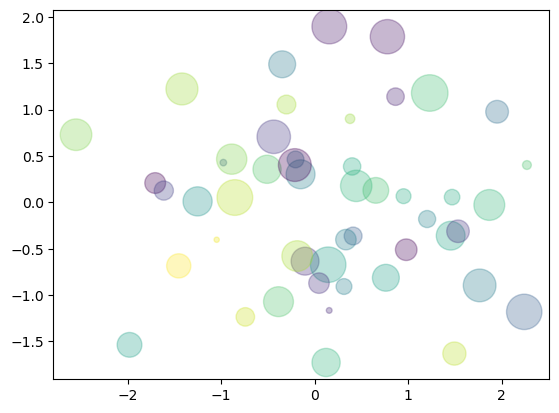

In [36]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)

x = rng.randn(50)  # 随机产生50个X轴坐标
y = rng.randn(50)  # 随机产生50个Y轴坐标

colors = rng.rand(50)  # 随机产生50个用于颜色映射的数值
sizes = 700 * rng.rand(50)  # 随机产生50个用于改变散点面积的数值

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')

plt.show()


并且上图中从“色盘”viridis中获取到的颜色，可以通过plt.colorbar( )显示为颜色条（与热力图同理）。
代码和可视化结果图如下所示

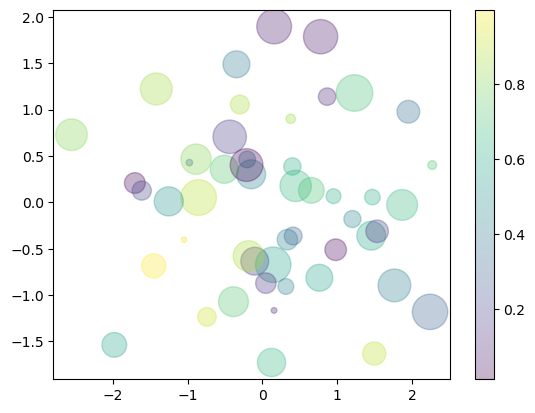

In [37]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)

x = rng.randn(50)  # 随机产生50个X轴坐标
y = rng.randn(50)  # 随机产生50个Y轴坐标

colors = rng.rand(50)  # 随机产生50个用于颜色映射的数值
sizes = 700 * rng.rand(50)  # 随机产生50个用于改变散点面积的数值

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')

plt.colorbar()  # 显示颜色条

plt.show()